## Importing Required Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Loading Data:

In [2]:
missing_val = ['n/a', '-', '?']

data = pd.read_csv('adult.csv', na_values = missing_val)

data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.dropna(axis=0, how='any',inplace= True) #Handling missing values
data.drop('fnlwgt',axis=1,inplace=True)
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
data.shape

(45222, 14)

# DATA PREPRATION:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education        45222 non-null  object
 3   educational-num  45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   gender           45222 non-null  object
 9   capital-gain     45222 non-null  int64 
 10  capital-loss     45222 non-null  int64 
 11  hours-per-week   45222 non-null  int64 
 12  native-country   45222 non-null  object
 13  income           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


## Observations:
* Target variable is 'income' which is a categorical value. So we need to perform Classifiation task.
* 'educational-num' is just mathematical representation of 'education', & is also a 'Ordinal' type variable. So we can use any of them. So for simplicity, we'll remove 'education' & will assign object dtype to 'educational-num'.

In [6]:
data.drop('education',axis=1,inplace=True)

In [7]:
data['educational-num'] = data['educational-num'].astype('object')

In [8]:
data_numeric = data.select_dtypes(include=['int64']) #just for further simple calculations
data_numeric.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
5,34,0,0,30


In [9]:
data_obj = data.select_dtypes(include=['object']) #just for further simple calculations
data_obj.head()

,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,6,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


<Figure size 1440x720 with 0 Axes>

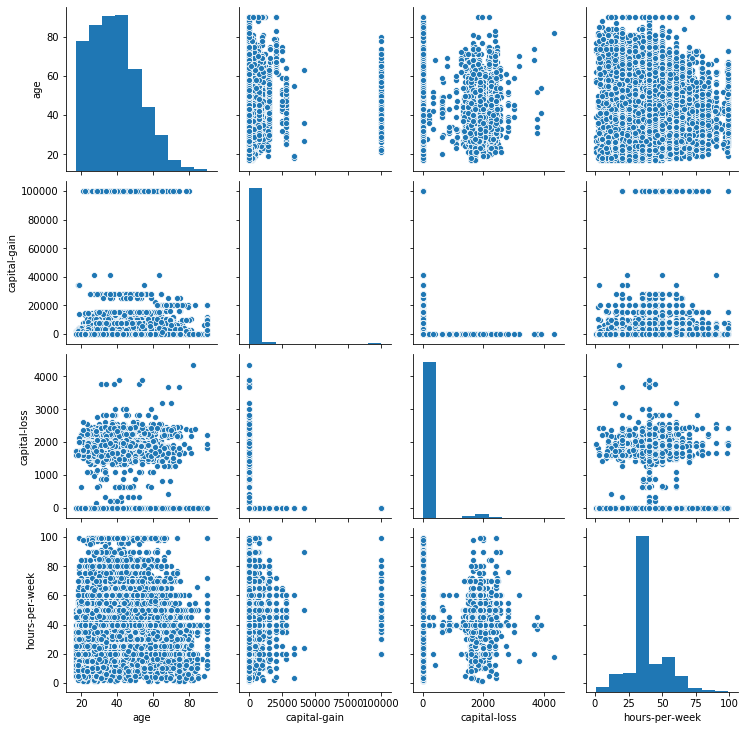

In [10]:
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

## Observations:
* It seems like there is low correlation between independent numeric variables. Let's check it.

In [11]:
cor=data_numeric.corr()
cor

,age,capital-gain,capital-loss,hours-per-week
age,1.000000,0.079683,0.059351,0.101992
capital-gain,0.079683,1.000000,-0.032102,0.083880
capital-loss,0.059351,-0.032102,1.000000,0.054195
hours-per-week,0.101992,0.083880,0.054195,1.000000


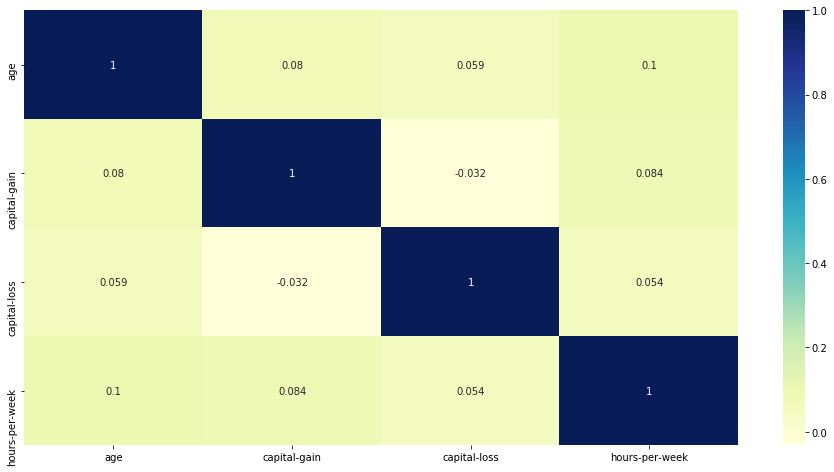

In [12]:
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Observation:
* The above two graphs show that there is very little correlation between independent variables.
* For classification task, normal distribution is not necessary.

In [13]:
data.describe()

,age,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1101.430344,88.595418,40.938017
std,13.217870,7506.430084,404.956092,12.007508
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


## Observation:
* Capital-gain & loss are having huge deviation. Let's plot them.

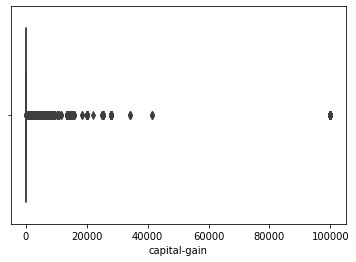

In [14]:
sns.boxplot(data['capital-gain'])

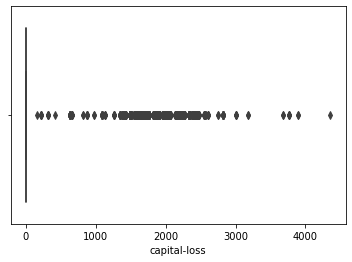

In [15]:
sns.boxplot(data['capital-loss'])

## Obervation:
* There is a huge number of outliers in capital-gain & loss. We'll deal try to reduce them after during logistic reg. For now let's see age & hrs/week.

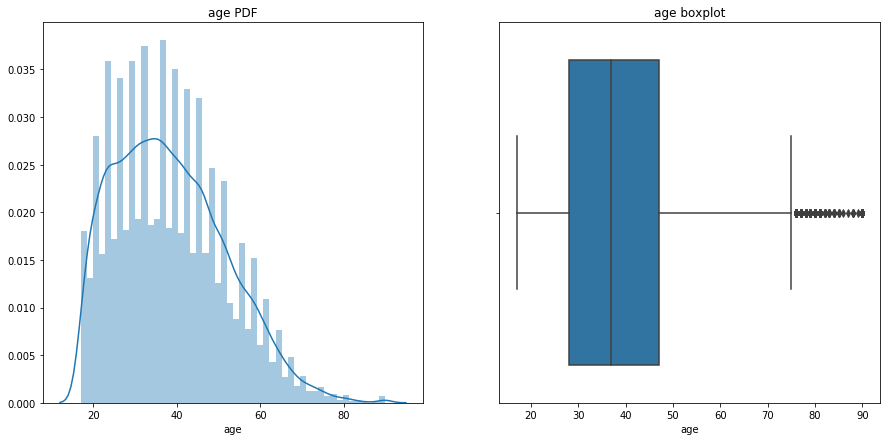

In [16]:
f, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
plt.title('age PDF')
sns.distplot(data['age'], hist=True, rug=False)
plt.subplot(1,2,2)
plt.title('age boxplot')
sns.boxplot(data['age'])

## Observations:
* Age is having a descent normal distribution. Although for logistic reg, it does not matter.

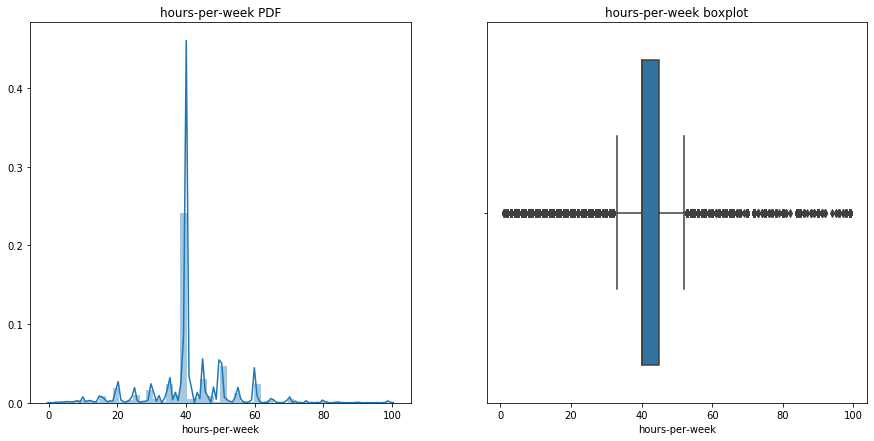

In [17]:
f, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
plt.title('hours-per-week PDF')
sns.distplot(data['hours-per-week'], hist=True, rug=False)
plt.subplot(1,2,2)
plt.title('hours-per-week boxplot')
sns.boxplot(data['hours-per-week'])

## Observation:
* hrs/week has a very high kurtosis valu with lots of noise. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A039869208>,
      dtype=object)

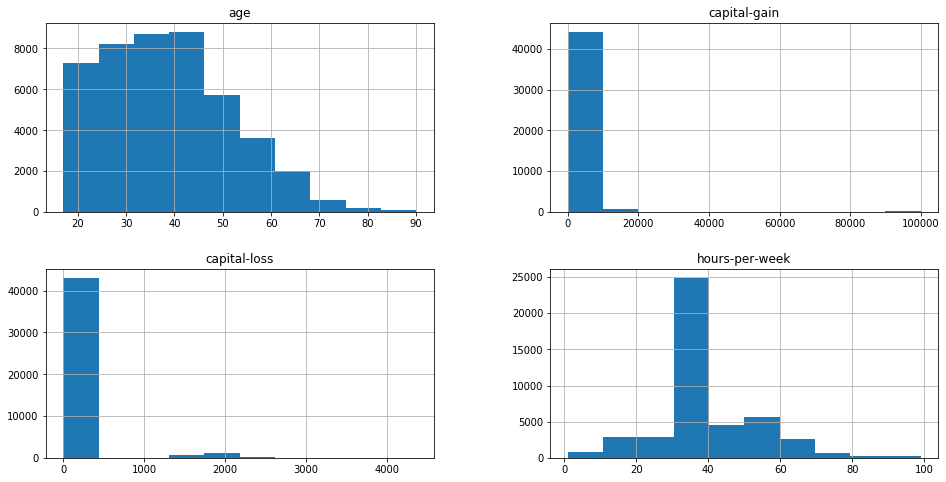

In [18]:
data[data.dtypes[(data.dtypes=="int64")].index.values].hist(figsize=[16,8])

## Observation:
* All the discussed points can be confrimed by above histograms.

# Checking Object Data:

Now we are going to check if any there is any duplicate in the object dtypes or not.

In [19]:
#just to know what we have
data_obj

,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,6,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,9,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [20]:
data['workclass'].astype('category').value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [21]:
data['marital-status'].astype('category').value_counts()

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [22]:
data['relationship'].astype('category').value_counts()

Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64

In [23]:
data['race'].astype('category').value_counts()

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64

In [24]:
data['native-country'].astype('category').value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

## Observation:
* Data seems clean & without dulicates. Let's scale it.

# Data Prepration:

In [25]:
# scaling numeric data
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

data_num = pd.DataFrame(scale.fit_transform(data_numeric), columns = data_numeric.columns) #Transformation for numeric data

data_num.head()

,age,capital-gain,capital-loss,hours-per-week
0,-1.024983,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.146733,-0.21878,0.754701
2,-0.798015,-0.146733,-0.21878,-0.078120
3,0.412481,0.877467,-0.21878,-0.078120
4,-0.344079,-0.146733,-0.21878,-0.910942


In [26]:
#encoding categorical data
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

#coverting the numpy ndarray to dataframe after encoding.
data_catg = pd.DataFrame(encoder.fit_transform(data_obj), columns=encoder.get_feature_names(data_obj.columns))

data_catg.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,educational-num_1,educational-num_2,educational-num_3,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [27]:
# creating scaled dataframe
df = pd.concat([data_num, data_catg], axis=1)

df.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,-1.024983,-0.146733,-0.21878,-0.078120,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.041455,-0.146733,-0.21878,0.754701,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.798015,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.412481,0.877467,-0.21878,-0.078120,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.344079,-0.146733,-0.21878,-0.910942,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [28]:
df.shape

(45222, 104)

In [29]:
y = df.pop('income_>50K')
y_1=df.pop('income_<=50K')
x = df

## Observation:
* I also popped 'income_<=50K' as we are dealing with two categories only. So here any one of the column has information about both. I decided to keep 'income_>50K' for model training.

In [30]:
#creating train test plit
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=100)

In [31]:
x_tr=x_train #Just to show them apart during rfe & pca
x_te=x_test
y_tr=y_train
y_te=y_test
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(31655, 102) (31655,)
(13567, 102) (13567,)


## Observation:
* There are lots of column & many of them are not needed. Let's see why.

# Reducing Dimensionality:

Let's first approach the expected way. Here instead of calculating without any dimensionality reduction, I'd like to start with PCA first. Then I'll discuss others.

 ## 1. PCA

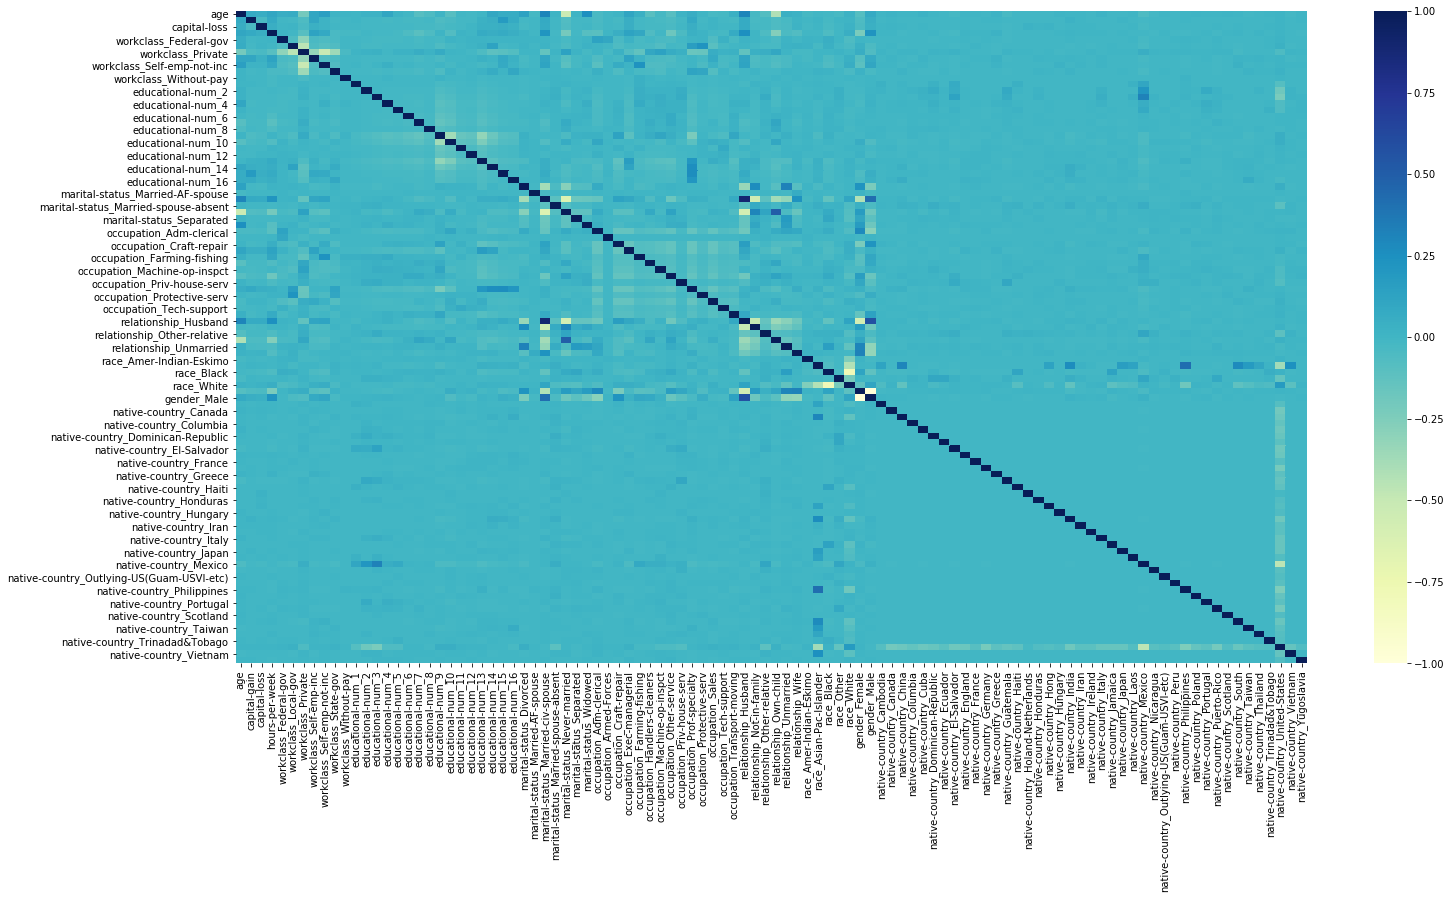

In [32]:
plt.figure(figsize=(24, 12))
sns.heatmap(x_train.corr(), cmap="YlGnBu")

## Obseravtion:
* There is significant correlation in our final dataframe. This can highly affect our model. So let's deal with it.

In [33]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [34]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

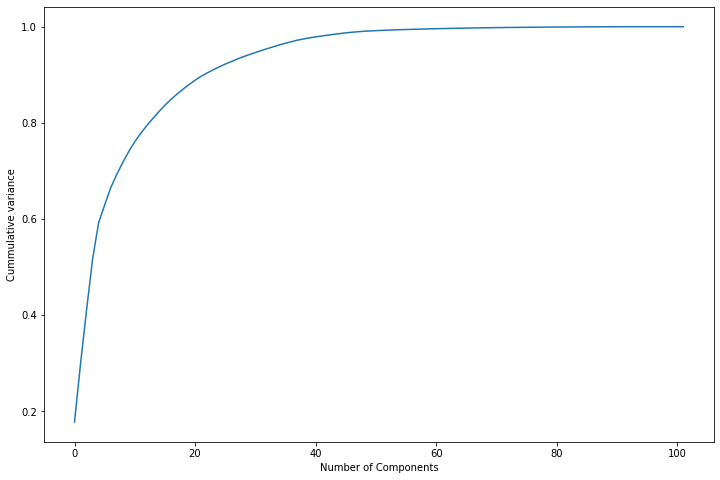

In [35]:
#showing how many components cover how much variance
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

## Observation:
* About 25components can cover >90% variance.
* There is not much difference for >50 components.

(cumsum matrix is not necessarily required.)

In [36]:
#but just to show
np.cumsum(pca.explained_variance_ratio_)

array([0.17758066, 0.29899968, 0.41081329, 0.51648273, 0.59219529,
       0.6289081 , 0.66481537, 0.69237581, 0.71738794, 0.74031602,
       0.76069184, 0.77835959, 0.79441827, 0.80897933, 0.82319609,
       0.83678021, 0.84866803, 0.85975321, 0.86995061, 0.87967988,
       0.88856024, 0.89676083, 0.90374933, 0.91023127, 0.91646048,
       0.92206312, 0.92742155, 0.93267274, 0.93751427, 0.94192127,
       0.9462168 , 0.95041761, 0.95438823, 0.95830874, 0.96213459,
       0.96560801, 0.96885839, 0.97201448, 0.97443487, 0.97680485,
       0.97879453, 0.98064191, 0.98235311, 0.98404903, 0.98564011,
       0.98717123, 0.98843215, 0.98947947, 0.99047221, 0.99115699,
       0.99175398, 0.99234376, 0.99284557, 0.99330944, 0.99372903,
       0.9941214 , 0.99448704, 0.99485107, 0.99519245, 0.99550796,
       0.99581401, 0.99608174, 0.99634495, 0.99660343, 0.99685081,
       0.9970911 , 0.99731777, 0.99752884, 0.9977155 , 0.99790113,
       0.99806985, 0.99822569, 0.99837015, 0.99850571, 0.99863

In [37]:
#Let's select 35 features
pca_final = PCA(n_components = 35, random_state = 0)

x_train_pca = pca_final.fit_transform(x_train) #transforming x_train data

In [38]:
x_train_pca.shape

(31655, 35)

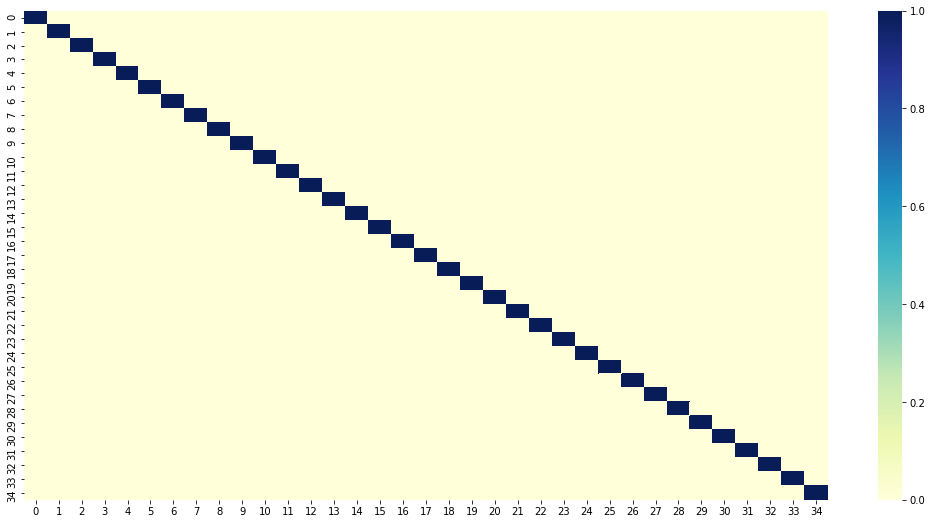

In [39]:
corrmat = np.corrcoef(x_train_pca.T)

plt.figure(figsize=(18, 9))

sns.heatmap(corrmat, cmap="YlGnBu")

## Observation:
* PCA has generated 35 independent components.

In [40]:
x_test_pca = pca_final.transform(x_test) #transforming x_test data

# LOGISTIC REGRESSION:

In [41]:
from sklearn.linear_model import LogisticRegression
clfr = LogisticRegression()
clfr.fit(x_train_pca, y_train) #giving train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred_pca = clfr.predict(x_test_pca)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_pca})

temp_df

,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,1.0
25507,0.0,0.0
553,0.0,1.0
...,...,...
19793,1.0,1.0
23298,1.0,1.0
2000,1.0,1.0
39689,1.0,1.0


In [43]:
from sklearn import metrics #Let's check for error
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_pca))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_pca))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca)))

Mean Absolute Error:  0.1549347681875138
Mean Squared Error:  0.1549347681875138
Root Mean Squared Error:  0.39361754049777026


In [44]:
metrics.accuracy_score(y_test, y_pred_pca)

0.8450652318124862

In [45]:
print(metrics.classification_report(y_test,y_pred_pca))

#number of components: 35

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10211
         1.0       0.73      0.60      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.80      0.76      0.78     13567
weighted avg       0.84      0.85      0.84     13567



## Observations:
* Above is short analysis of the model. Model has about 85% accuracy.
* Recall & f1-score are also calculated.
* Model predicts <=50K income quit effectively. (Probably because >50K part is having more random distribution.)

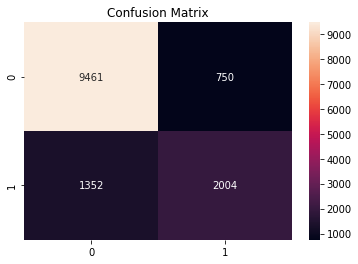

In [46]:
con = metrics.confusion_matrix(y_test, y_pred_pca)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Observation:
* Condfusion matrix shows TP,TN,FN,FP values repectively. Recall & accuracy are already calculated.

### Let's try more algorithms.

# KNN:

In [47]:
from sklearn.neighbors import KNeighborsClassifier
clfr = KNeighborsClassifier()
clfr.fit(x_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
y_pred_pca = clfr.predict(x_test_pca)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_pca})
temp_df

,Actual,Predicted
40273,0.0,0.0
1984,1.0,1.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,1.0
...,...,...
19793,1.0,1.0
23298,1.0,1.0
2000,1.0,1.0
39689,1.0,1.0


In [49]:
# calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_pca)

0.8286282892312228

In [50]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_pca))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_pca))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca)))

Mean Absolute Error:  0.1713717107687772
Mean Squared Error:  0.1713717107687772
Root Mean Squared Error:  0.41397066414031947


In [51]:
print(metrics.classification_report(y_test,y_pred_pca))

# Number of components: 35

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     10211
         1.0       0.67      0.59      0.63      3356

    accuracy                           0.83     13567
   macro avg       0.77      0.75      0.76     13567
weighted avg       0.82      0.83      0.82     13567



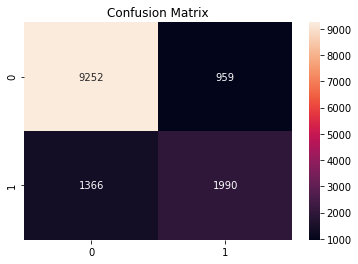

In [52]:
con = metrics.confusion_matrix(y_test, y_pred_pca)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Observations:
* As compared to Log Reg, KNN has lesser accuracy.
* KNN also shows more error, lesser recall & f1-score.
* So here Log Reg is better option than KNN.
* This may imply that both categories are dispersed into one-anothr to some extent. 

# DESCISION TREE:

In [53]:
from sklearn.tree import DecisionTreeClassifier
clfr = DecisionTreeClassifier(max_depth = 9)
clfr.fit(x_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
y_pred_pca = clfr.predict(x_test_pca)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_pca})
temp_df

,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,0.0
...,...,...
19793,1.0,1.0
23298,1.0,0.0
2000,1.0,1.0
39689,1.0,1.0


In [55]:
metrics.accuracy_score(y_test, y_pred_pca)

0.8427802756689025

In [56]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_pca))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_pca))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca)))

Mean Absolute Error:  0.15721972433109752
Mean Squared Error:  0.15721972433109752
Root Mean Squared Error:  0.3965094252739744


In [57]:
print(metrics.classification_report(y_test,y_pred_pca))

# Number of components: 35

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     10211
         1.0       0.76      0.54      0.63      3356

    accuracy                           0.84     13567
   macro avg       0.81      0.74      0.76     13567
weighted avg       0.84      0.84      0.83     13567



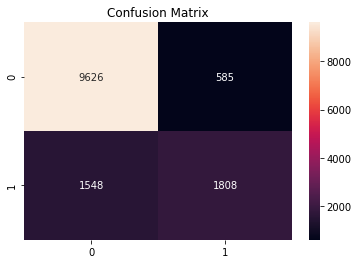

In [58]:
con = metrics.confusion_matrix(y_test, y_pred_pca)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Observation:
* DT is a powerful alogrihm. In this dataset, it is quite a descent choice. It is better than KNN & comparable with Log Reg. Although Log Reg is still better as it has higher f1-score & lesser error.

# SVM:

Let's deal with one of the most powerful & flexible classification Algo.

In [59]:
from sklearn.svm import SVC
classifier = SVC() # using rbf kernel
classifier.fit(x_train_pca, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
y_pred_pca = classifier.predict(x_test_pca)

In [61]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_pca)

0.8522149332940223

In [62]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_pca))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_pca))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca)))

Mean Absolute Error:  0.14778506670597774
Mean Squared Error:  0.14778506670597774
Root Mean Squared Error:  0.38442823349225763


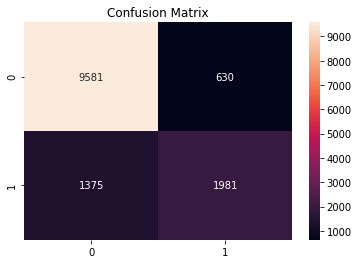

In [63]:
con = metrics.confusion_matrix(y_test, y_pred_pca)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [64]:
print(metrics.classification_report(y_test,y_pred_pca))

# Number of Components: 35

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     10211
         1.0       0.76      0.59      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.82      0.76      0.78     13567
weighted avg       0.85      0.85      0.85     13567



## Observations:
* SVM has highest accuracy, recall value & f1-score of all the discussed algos.
* It has lesser error than all the discussed algos.
* It has higher space & time complexity.

## 2. RFE:

## * Logistic Regresiion
### Let's create baseline model first

In [65]:
clsfr=LogisticRegression()
base_model=clsfr.fit(x_tr,y_tr)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [66]:
y_pred = clsfr.predict(x_te)

In [67]:
metrics.accuracy_score(y_te, y_pred)

0.8494140193115648

In [68]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

Mean Absolute Error:  0.15058598068843518
Mean Squared Error:  0.15058598068843518
Root Mean Squared Error:  0.38805409505433025


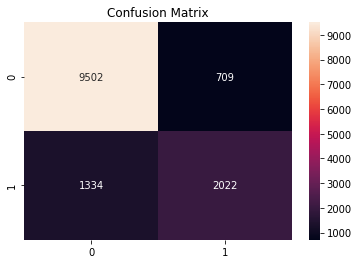

In [69]:
con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [70]:
print(metrics.classification_report(y_te,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10211
         1.0       0.74      0.60      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567



## Observations:
* One may say why to go through any knid of dimensional reduction when we have a model having about same accuracy, recall, f-1 score & error. But the thing here is in PCA we had only 35 components but here we have 102 components. To get a glimpse, we used ~291% more data in above model. This significantly increases time & space complexity.
* Warnings are because of very high number of iterations. (My PC doesn't seem to like that much iterations.)

### Let's dive into another way of dimensionality reduction.

In [71]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [72]:
rfe = RFE(estimator=clsfr, step=67) #removing 67 features. So total remained features are 35
rfe = rfe.fit(x_tr, y_tr)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [73]:
selected_rfe = pd.DataFrame({'Feature':list(x_tr.columns), 'Ranking': rfe.ranking_})
selected_rfe.sort_values(by='Ranking')

,Feature,Ranking
50,relationship_Other-relative,1
33,marital-status_Widowed,1
86,native-country_Mexico,1
69,native-country_England,1
37,occupation_Exec-managerial,1
...,...,...
57,race_Other,2
58,race_White,2
60,gender_Male,2
67,native-country_Ecuador,2


In [74]:
x_train_rfe = rfe.transform(x_tr)
x_test_rfe = rfe.transform(x_te)

In [75]:
x_train_rfe[0:3]

array([[-0.1467332,  1.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         1.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  1.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ],
       [-0.1467332,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  1.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         1.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.    

In [76]:
rfe_model = clsfr.fit(x_train_rfe,y_tr)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [77]:
y_pred = clsfr.predict(x_test_rfe)

In [78]:
metrics.accuracy_score(y_te, y_pred)

0.8422643178300288

In [79]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

Mean Absolute Error:  0.15773568216997125
Mean Squared Error:  0.15773568216997125
Root Mean Squared Error:  0.39715951728489557


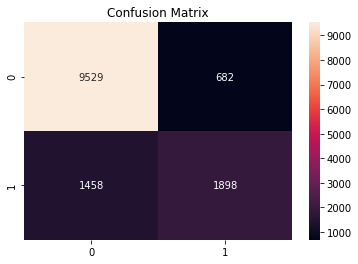

In [80]:
con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [81]:
print(metrics.classification_report(y_te,y_pred))

# RFE step size: 67

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10211
         1.0       0.74      0.57      0.64      3356

    accuracy                           0.84     13567
   macro avg       0.80      0.75      0.77     13567
weighted avg       0.83      0.84      0.83     13567



## Observations:
* As one can see RFE model is also a very good model. Its acuuracy, recall, f1-score etc are slightly lesser than the base_model but there we considered 102 features & here we only took 35 features for reference.
* Just like PCA it is also a way of demensional reduction. In PCA, we merged on the basic of corr & tried to cover as much variance as we could. Here, we took most imporant features only.
* But the problem with this is that how to select the step. How to know which is the best value.

For that we use RFE with Cross Validation. (We are going to find best features in one go.)

In [82]:
rfecv = RFECV(estimator=clsfr, step=1, cv=5,scoring='accuracy')
rfecv = rfecv.fit(x_tr,y_tr)
print('optinal no. of features:', rfecv.n_features_)
print('Best Features:', x_tr.columns[refcv.support_])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

optinal no. of features: 89


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


NameError: name 'refcv' is not defined

In [83]:
rfecv.grid_scores_ #basically a kind of score for importance based upon accuracy

array([0.75921655, 0.78767967, 0.78846944, 0.79175486, 0.79466119,
       0.7963039 , 0.79693571, 0.79813616, 0.7986416 , 0.7989891 ,
       0.79914705, 0.8010109 , 0.80325383, 0.81083557, 0.81791186,
       0.8244827 , 0.82909493, 0.83329648, 0.83348602, 0.83351761,
       0.83361238, 0.83358079, 0.8338967 , 0.83452851, 0.83468646,
       0.83487601, 0.8345601 , 0.83531828, 0.835571  , 0.83563418,
       0.83582372, 0.83585532, 0.83613963, 0.83677144, 0.83718212,
       0.83743484, 0.83746644, 0.83743484, 0.83752962, 0.83762439,
       0.83781393, 0.83787711, 0.83809825, 0.83812984, 0.83822461,
       0.83794029, 0.83794029, 0.83844574, 0.83869847, 0.83879324,
       0.8386037 , 0.83882483, 0.83857211, 0.83835097, 0.83885642,
       0.83869847, 0.83882483, 0.83888801, 0.83986732, 0.83989891,
       0.83980414, 0.84056231, 0.84021482, 0.84075186, 0.84056231,
       0.84138367, 0.84229979, 0.84217343, 0.84334228, 0.84350024,
       0.84343706, 0.84346865, 0.8439741 , 0.84438477, 0.84485

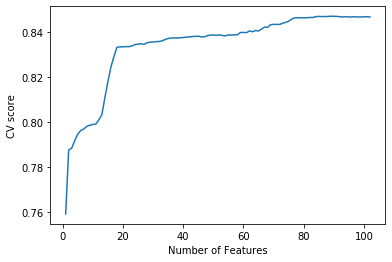

In [84]:
plt.figure()
plt.xlabel('Number of Features')
plt.ylabel('CV score')
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

## Observations:
* From this graph we use refcv transform to find the best output, or we could simply select features acording to our need. Like selecting only 20 features will give ~83% accuracy.

#### just for the sake of completion, let's use rfecv transform

In [85]:
x_train_rfecv = rfecv.transform(x_tr)
x_test_rfecv = rfecv.transform(x_te)

In [86]:
rfecv_model = clsfr.fit(x_train_rfecv, y_tr)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [87]:
y_pred = clsfr.predict(x_test_rfecv)

In [88]:
metrics.accuracy_score(y_te, y_pred)

0.8490454779980836

In [89]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

Mean Absolute Error:  0.15095452200191642
Mean Squared Error:  0.15095452200191642
Root Mean Squared Error:  0.38852866303776923


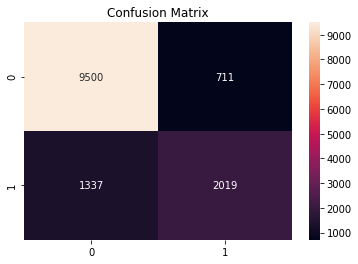

In [90]:
con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [91]:
print(metrics.classification_report(y_te,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10211
         1.0       0.74      0.60      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567



### Observations:
* The above is the best model (in terms of accuracy), RFECV or RFE can give. But comparing to RFE, there is not much difference considering we used about 35 feature in RFE, but in RFECV we used about 75 features.

# KNN:

## * Base Model

In [92]:
clsfr=KNeighborsClassifier()
base_model=clsfr.fit(x_tr,y_tr)

In [93]:
y_pred = clsfr.predict(x_te)

In [94]:
metrics.accuracy_score(y_te, y_pred)

0.832534827154124

In [98]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

Mean Absolute Error:  0.16746517284587603
Mean Squared Error:  0.16746517284587603
Root Mean Squared Error:  0.4092250882410266


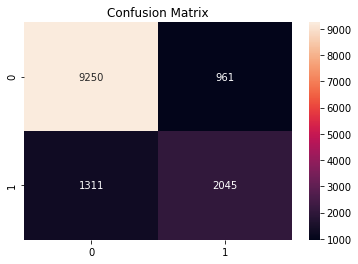

In [99]:
con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [100]:
print(metrics.classification_report(y_te,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     10211
         1.0       0.68      0.61      0.64      3356

    accuracy                           0.83     13567
   macro avg       0.78      0.76      0.77     13567
weighted avg       0.83      0.83      0.83     13567



## * KNN using RFE:

In [101]:
rfe_model = clsfr.fit(x_train_rfe,y_tr)
y_pred = clsfr.predict(x_test_rfe)
metrics.accuracy_score(y_te, y_pred)

0.8038623129652834

In [102]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

Mean Absolute Error:  0.1961376870347166
Mean Squared Error:  0.1961376870347166
Root Mean Squared Error:  0.44287434677876364


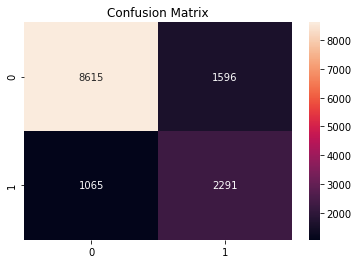

              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87     10211
         1.0       0.59      0.68      0.63      3356

    accuracy                           0.80     13567
   macro avg       0.74      0.76      0.75     13567
weighted avg       0.82      0.80      0.81     13567



In [103]:
con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
print(metrics.classification_report(y_te,y_pred))

# RFE STep Size: 67

## Observation:
* Because we used only 35 features, KNN using RFE is not as goog as base KNN. Although it is still a descent model. We need to increase no. of feature for better KNN.

## *Base DT

In [104]:
clsfr = DecisionTreeClassifier(max_depth = 9)
base_model=clsfr.fit(x_tr,y_tr)
y_pred = clsfr.predict(x_te)

metrics.accuracy_score(y_te, y_pred)

0.8561951794796197

Mean Absolute Error:  0.14380482052038032
Mean Squared Error:  0.14380482052038032
Root Mean Squared Error:  0.3792160604726286


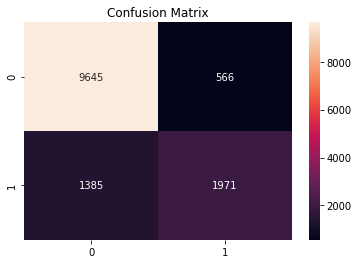

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     10211
         1.0       0.78      0.59      0.67      3356

    accuracy                           0.86     13567
   macro avg       0.83      0.77      0.79     13567
weighted avg       0.85      0.86      0.85     13567



In [105]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))
con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
print(metrics.classification_report(y_te,y_pred))

## *DT using RFE:

In [106]:
rfe_model = clsfr.fit(x_train_rfe,y_tr)
y_pred = clsfr.predict(x_test_rfe)
metrics.accuracy_score(y_te, y_pred)

0.8488980614726911

Mean Absolute Error:  0.1511019385273089
Mean Squared Error:  0.1511019385273089
Root Mean Squared Error:  0.3887183280053938


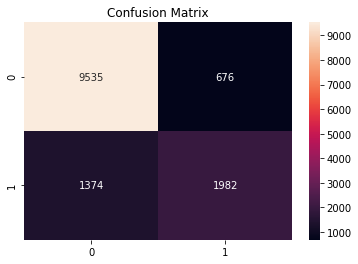

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10211
         1.0       0.75      0.59      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.76      0.78     13567
weighted avg       0.84      0.85      0.84     13567



In [107]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
print(metrics.classification_report(y_te,y_pred))

# RFE Step Size: 67

## Observation:
* The RFE uses ~291% less data & give a model with about same performance. (as expected)

## *Base SVM:

In [108]:
clsfr = SVC() # using rbf kernel
base_model=clsfr.fit(x_tr, y_tr)
y_pred = clsfr.predict(x_te)

metrics.accuracy_score(y_te, y_pred)

0.8520675167686298

Mean Absolute Error:  0.14793248323137023
Mean Squared Error:  0.14793248323137023
Root Mean Squared Error:  0.3846199204817273


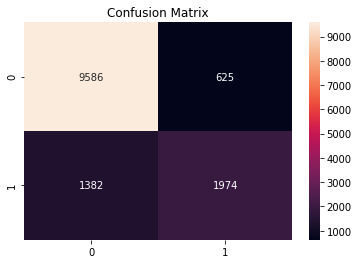

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     10211
         1.0       0.76      0.59      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.82      0.76      0.78     13567
weighted avg       0.85      0.85      0.85     13567



In [109]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))
con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
print(metrics.classification_report(y_te,y_pred))

## *SVM using RFE:

In [110]:
rfe_model = clsfr.fit(x_train_rfe,y_tr)
y_pred = clsfr.predict(x_test_rfe)
metrics.accuracy_score(y_te, y_pred)

0.8444755657109162

Mean Absolute Error:  0.1555244342890838
Mean Squared Error:  0.1555244342890838
Root Mean Squared Error:  0.3943658634936394


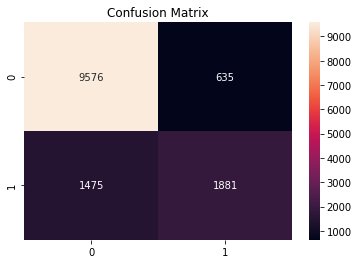

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     10211
         1.0       0.75      0.56      0.64      3356

    accuracy                           0.84     13567
   macro avg       0.81      0.75      0.77     13567
weighted avg       0.84      0.84      0.84     13567



In [111]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
print(metrics.classification_report(y_te,y_pred))

# RFE Step Size: 67

## Observation:
* Here also the result of base SVM & SVM using RFE are in agreement. Hence RFE is also a very powerful tool for dimensionality reduction.

* Considering Everything we did till now, it is clear that good EDA, Data prepration are necessary for implementing an algorithm. Also, the method of dimensionality reduction & the ML algo to be chosen depends upon many factors like hardware, software, requirements, tolerance, economy etc.

# The End!